In [1]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from prophet import Prophet
from IPython.display import display

Importing plotly failed. Interactive plots will not work.


In [2]:
file = "overview-stock-pangan.csv"
df = pd.read_csv(file)

07:37:55 - cmdstanpy - INFO - Chain [1] start processing
07:37:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ivana\.conda\envs\dispanhan\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


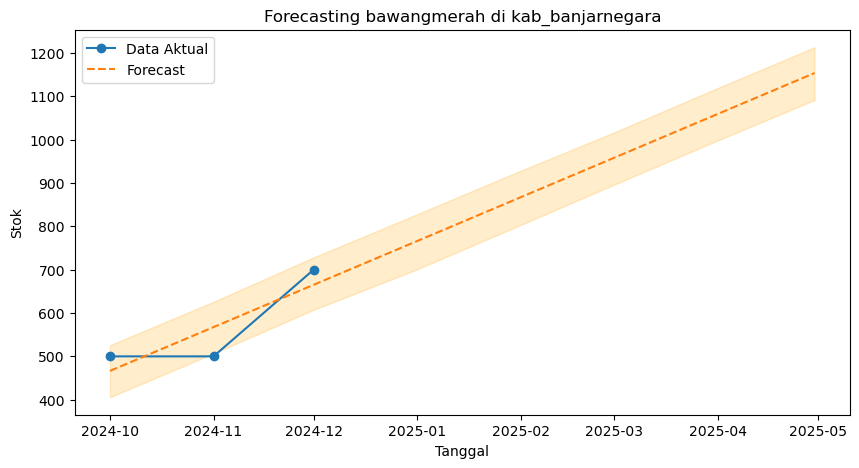

In [3]:
kota_dropdown = widgets.Dropdown(
    options=sorted(df["kota"].unique().tolist()) if not df.empty else [],
    description="Kota:",
    style={'description_width': 'initial'}
)

bahanpokok_dropdown = widgets.Dropdown(
    options=sorted(df["bahanpokok"].unique().tolist()) if not df.empty else [],
    description="Bahan Pokok:",
    style={'description_width': 'initial'}
)

# Tombol untuk memproses forecasting
run_button = widgets.Button(description="Run Forecasting")

In [4]:
def run_forecasting(button):
    # Ambil nilai dropdown
    selected_kota = kota_dropdown.value
    selected_bahanpokok = bahanpokok_dropdown.value
    
    # Filter dataset berdasarkan input pengguna
    df_filtered = df[(df["kota"] == selected_kota) & (df["bahanpokok"] == selected_bahanpokok)].copy()

    if df_filtered.empty:
        print(f"Tidak ada data untuk {selected_kota} dengan bahan pokok {selected_bahanpokok}")
        return

    # Konversi kolom tahun & bulan ke format datetime
    df_filtered["ds"] = pd.to_datetime(df_filtered["tahun"].astype(str) + "-" + df_filtered["bulan"].astype(str) + "-01")
    df_filtered = df_filtered[["ds", "stok"]].rename(columns={"stok": "y"})

    # Inisialisasi dan latih model Prophet
    model = Prophet()
    model.fit(df_filtered)

    # Buat prediksi untuk 5 bulan ke depan
    future_dates = model.make_future_dataframe(periods=5, freq='M')
    forecast = model.predict(future_dates)

    # Visualisasi hasil
    plt.figure(figsize=(10, 5))
    plt.plot(df_filtered["ds"], df_filtered["y"], label="Data Aktual", marker="o")
    plt.plot(forecast["ds"], forecast["yhat"], label="Forecast", linestyle="dashed")
    plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], alpha=0.2, color="orange")
    plt.xlabel("Tanggal")
    plt.ylabel("Stok")
    plt.title(f"Forecasting {selected_bahanpokok} di {selected_kota}")
    plt.legend()
    plt.show()

# Hubungkan tombol dengan fungsi
run_button.on_click(run_forecasting)

# Tampilkan semua widget
display(kota_dropdown, bahanpokok_dropdown, run_button)

Dropdown(description='Kota:', options=('kab_banjarnegara', 'kab_banyumas', 'kab_batang', 'kab_blora', 'kab_boy…

Dropdown(description='Bahan Pokok:', options=('bawangmerah', 'bawangputih', 'beras', 'cabaibesar', 'cabairawit…

Button(description='Run Forecasting', style=ButtonStyle())